# Users aggregated sentiment analysis

Due to the nature of the research subject, it's expected that the observed reactions are highly influenced by the personal beliefs and state of mind of each user. Said so, it may be difficult to observe any subset of clustered data points, but running a deeper analysis of the whole users space might clarify any possible further doubt.

## Data loading

The information used in this analysis is loaded from a dataframe exported by the pipeline, where each row contains a user's identifier and the compound polarities derived from the sentiment analysis of that user's reactions to each artwork.

In [1]:
import pandas

dataframe = pandas.read_pickle(f"dataset/sentiment/users.pickle")
dataframe.head()

user_id       0       1    2       3     4
0        0  0.0000 -0.7650  0.0  0.3612  0.00
1        1 -0.2960  0.0000  0.0  0.0000 -0.25
2        2 -0.5994  0.1280  0.0 -0.1779  0.00
3        3 -0.2960  0.0000  0.0  0.0000  0.00
4        4 -0.1010 -0.2755  0.0  0.5994  0.00

## Clustering

The code below tries to perform clustering following the K-Means algorithm. The user id is removed from the dataset, and a PCA decomposition is applied to each entry to reduce the size of features to 2. The K hyperparameter is fixed to 3.

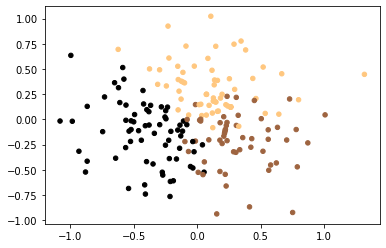

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

df_no_user = dataframe[[0,1,2,3,4]]
kmeans.fit(df_no_user)
y_kmeans = kmeans.predict(df_no_user)

pca.fit(df_no_user)
df_pca  = pca.transform(df_no_user)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, s=20, cmap='copper');

## Conclusions

The clustering plot highlights that it's not possible to group up observers in cohesive clusters. It seems like most polarities are moderate, which means that, graphically speaking, they fall in the center of the graph, while in algebrical terms the polarities belong to the range [-0.4, 0,4]. Nevertheless, there is a consistent amount of outliers in the middle of the graph and a considerable count of very high (or low) polarities to the sides, meaning that it's difficult to make any subdivision on polarities data which may be generally valid.